Dominos - Predictive Purchase Order System

Dataset Exploration - Sales

In [22]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

print("Dataset Overview:")
print(df.info())  # Data types, non-null count
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # Summary statistics for numerical columns


# Count missing values per column
print("\nMissing Data Count per Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Display rows that have missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])  # Display rows with missing values

# Unique Value Counts per Column

columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)




<class 'pandas.core.frame.DataFrame'>
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None

Summary Statistics for Numerical Columns:
           pizza_id      order_id      quantity    un

In [78]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

# Display rows with missing values in the pizza_ingredients column
missing_ingredients = df.loc[df['pizza_ingredients'].isnull()]

# Print the rows with missing values
print("Rows with missing values in 'pizza_ingredients':")
print(missing_ingredients)

<class 'pandas.core.frame.DataFrame'>
Rows with missing values in 'pizza_ingredients':
     pizza_id  order_id   pizza_name_id  quantity order_date order_time  \
580       581       254   five_cheese_l         1   4/1/2015   22:22:13   
581       582       255   five_cheese_l         1   5/1/2015   11:23:35   
582       583       255  green_garden_m         1   5/1/2015   11:23:35   
583       584       255      hawaiian_l         1   5/1/2015   11:23:35   
584       585       255   spinach_fet_m         1   5/1/2015   11:23:35   
585       586       256   pep_msh_pep_l         1   5/1/2015   11:56:06   
586       587       257      cali_ckn_l         1   5/1/2015   11:59:04   
630       631       277   four_cheese_m         1   5/1/2015   15:41:50   
631       632       278   ital_veggie_m         1   5/1/2015   15:49:21   
632       633       278    southw_ckn_l         1   5/1/2015   15:49:21   
633       634       279      cali_ckn_m         1   5/1/2015   16:07:03   
634       635

Data Cleaning - sales

Missing values before filling:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Missing values after filling:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Processing column: pizza_id
Rows before removing outliers:
count    48620.000000
mean     24310.500000
std      14035.529381
min          1.000000
25%      12155.750000
50%      24310.500000
75%      36465.250000
max      48620.000000
Name: pizza_id, dtype: float64

Rows after removing outliers:
count    48620.000000
mean     24310.500000
std  

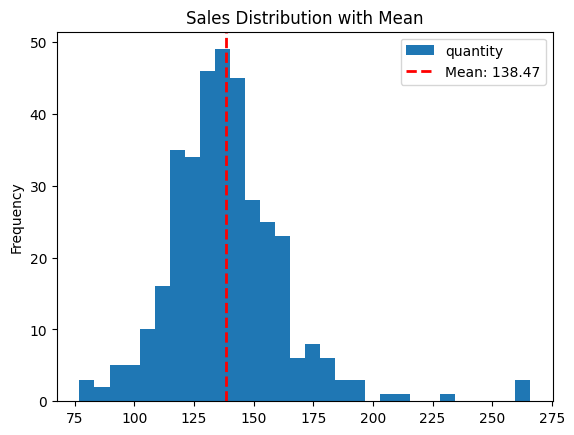

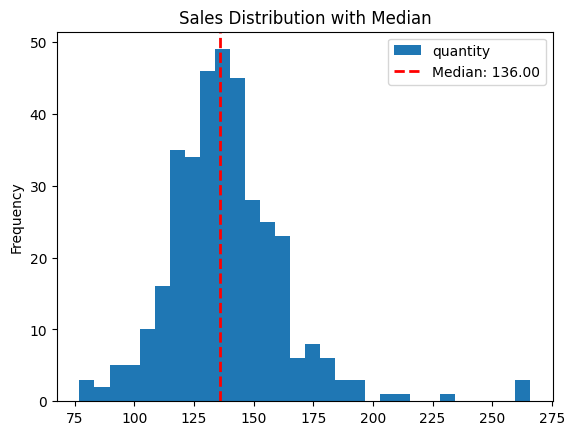

Processed data has been saved to: D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Step 1: Fill missing values
print("Missing values before filling:\n", df.isnull().sum())

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(df, column, ref_columns)

print("Missing values after filling:\n", df.isnull().sum())

# Step 2: Replace specific values in 'pizza_ingredients'
df['pizza_ingredients'] = df['pizza_ingredients'].replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"
})

# Step 3: Remove outliers
def remove_outliers(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for numerical_column in numerical_columns:
        print(f"\nProcessing column: {numerical_column}")
        
        # Print rows before removing outliers
        print("Rows before removing outliers:")
        print(df[numerical_column].describe())
        
        # Calculate Q1, Q3, and IQR
        Q1 = df[numerical_column].quantile(0.25)
        Q3 = df[numerical_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filter out outliers
        df = df[(df[numerical_column] >= (Q1 - 1.5 * IQR)) & (df[numerical_column] <= (Q3 + 1.5 * IQR))]
        
        # Print rows after removing outliers
        print("\nRows after removing outliers:")
        print(df[numerical_column].describe())
    
    return df

df_filtered = remove_outliers(df)

# Step 4: Calculate statistics for numerical columns
stats = {
    'mean': [df_filtered['unit_price'].mean(), df_filtered['total_price'].mean(), df_filtered['quantity'].mean()],
    'median': [df_filtered['unit_price'].median(), df_filtered['total_price'].median(), df_filtered['quantity'].median()],
    'mode': [df_filtered['unit_price'].mode()[0], df_filtered['total_price'].mode()[0], df_filtered['quantity'].mode()[0]],
    'std': [df_filtered['unit_price'].std(), df_filtered['total_price'].std(), df_filtered['quantity'].std()],
    'var': [df_filtered['unit_price'].var(), df_filtered['total_price'].var(), df_filtered['quantity'].var()]
}

# View in DataFrame
compare = pd.DataFrame(stats, index=['unit_price', 'total_price', 'quantity'])
print(compare)

# Step 5: Parse 'order_date' column
# Define a list of date formats to try
date_formats = ['%d-%m-%Y', '%d/%m/%Y']

def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the parsing function to the 'order_date' column
df['order_date'] = df['order_date'].apply(parse_dates)

# Convert to the desired format
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')

# Convert the date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Step 6: Extract time features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

# Verify the data types
print(df.dtypes)

# Step 7: Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate mean and median sales thresholds
Mean_sales_threshold = df_daily_count['quantity'].mean()
Median_sales_threshold = df_daily_count['quantity'].median()

# Step 8: Visualize sales distribution with the mean
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Mean')
plt.axvline(Mean_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {Mean_sales_threshold:.2f}')
plt.legend()
plt.show()

# Step 9: Visualize sales distribution with the median
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Median')
plt.axvline(Median_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Median: {Median_sales_threshold:.2f}')
plt.legend()
plt.show()

# Save the output as a CSV file
output_file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv"
df.to_csv(output_file_path, index=False)

print("Processed data has been saved to:", output_file_path)



Feature Engineering - sales 

   order_date  quantity          sales_type
0  2015-01-01       162             Holiday
1  2015-01-02       165  Promotional Period
2  2015-01-03       158  Promotional Period
3  2015-01-04       106        Normal Sales
4  2015-01-05       125        Normal Sales


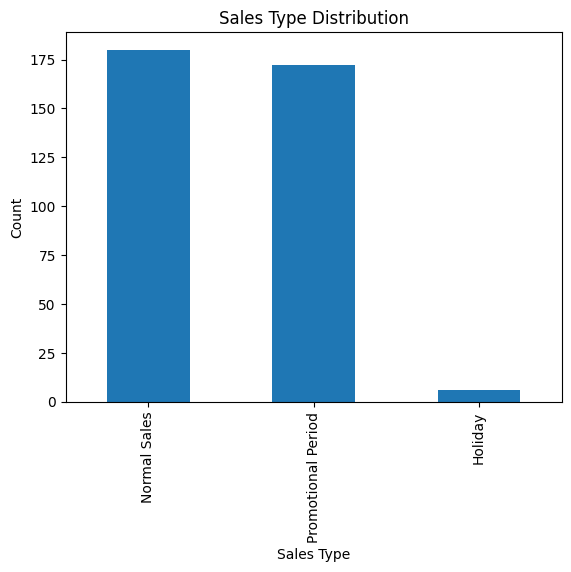

Output saved to: D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load the data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv"
df = pd.read_csv(file_path)

# Assuming df has columns 'order_date' and 'quantity'
# Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate the median sales threshold
Median_sales_threshold = df_daily_count['quantity'].median()

# Load US holidays for 2015
us_holidays = holidays.US(years=2015)

# Function to classify the date as 'Normal', 'Holiday', or 'Promotional Period'
def classify_sales(row):
    if row['quantity'] > Median_sales_threshold:
        if row['order_date'] in us_holidays:
            return 'Holiday'
        else:
            return 'Promotional Period'
    else:
        return 'Normal Sales'

# Apply the classification function
df_daily_count['sales_type'] = df_daily_count.apply(classify_sales, axis=1)

# Check the classified DataFrame
print(df_daily_count.head())

# Optional: Visualize the classified sales types
df_daily_count['sales_type'].value_counts().plot(kind='bar', title='Sales Type Distribution')
plt.xlabel('Sales Type')
plt.ylabel('Count')
plt.show()

# Convert sales_type to dummy variables
df_daily_count = pd.get_dummies(df_daily_count, columns=['sales_type'])

# Rename columns for clarity
df_daily_count = df_daily_count.rename(columns={
    'sales_type_Holiday': 'Holiday',
    'sales_type_Normal Sales': 'Normal Sales',
    'sales_type_Promotional Period': 'Promotional Period'
})

# Convert boolean columns to integer
df_daily_count['Holiday'] = df_daily_count['Holiday'].map({True: 1, False: 0})
df_daily_count['Normal Sales'] = df_daily_count['Normal Sales'].map({True: 1, False: 0})
df_daily_count['Promotional Period'] = df_daily_count['Promotional Period'].map({True: 1, False: 0})

# Merge the daily count with the original DataFrame
df = pd.merge(df, df_daily_count, on='order_date', how='inner')

# Rename columns to avoid conflicts
df = df.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'Total quantity per day'})

# Save the output DataFrame to a CSV file
output_file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df.to_csv(output_file_path, index=False)

print("Output saved to:", output_file_path)


In [56]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day_of_week,Total quantity per day,Holiday,Normal Sales,Promotional Period
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,January,Thursday,162,1,0,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,January,Thursday,162,1,0,0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,January,Thursday,162,1,0,0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,January,Thursday,162,1,0,0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,January,Thursday,162,1,0,0


In [1]:
import pandas as pd

# Load the CSV file
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df = pd.read_csv(file_path)

# Get unique value counts for each column
unique_counts = df.nunique()

# Display the unique value counts
print(unique_counts)


pizza_id                  48620
order_id                  21350
pizza_name_id                91
quantity                      4
order_date                  358
order_time                16382
unit_price                   25
total_price                  56
pizza_size                    5
pizza_category                4
pizza_ingredients            32
pizza_name                   32
year                          1
month                        12
day_of_week                   7
Total quantity per day       96
Holiday                       2
Normal Sales                  2
Promotional Period            2
dtype: int64


Exploratory Data Analysis 

Pizzas sold in week 7:
The Barbecue Chicken Pizza: 54 pizzas
The Big Meat Pizza: 33 pizzas
The Brie Carre Pizza: 12 pizzas
The Calabrese Pizza: 18 pizzas
The California Chicken Pizza: 45 pizzas
The Chicken Alfredo Pizza: 19 pizzas
The Chicken Pesto Pizza: 19 pizzas
The Classic Deluxe Pizza: 39 pizzas
The Five Cheese Pizza: 30 pizzas
The Four Cheese Pizza: 45 pizzas
The Greek Pizza: 34 pizzas
The Green Garden Pizza: 26 pizzas
The Hawaiian Pizza: 45 pizzas
The Italian Capocollo Pizza: 27 pizzas
The Italian Supreme Pizza: 36 pizzas
The Italian Vegetables Pizza: 28 pizzas
The Mediterranean Pizza: 11 pizzas
The Mexicana Pizza: 35 pizzas
The Napolitana Pizza: 28 pizzas
The Pepper Salami Pizza: 17 pizzas
The Pepperoni Pizza: 55 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 24 pizzas
The Prosciutto and Arugula Pizza: 29 pizzas
The Sicilian Pizza: 53 pizzas
The Soppressata Pizza: 19 pizzas
The Southwest Chicken Pizza: 41 pizzas
The Spicy Italian Pizza: 33 pizzas
The Spinach Pesto Pizza: 15

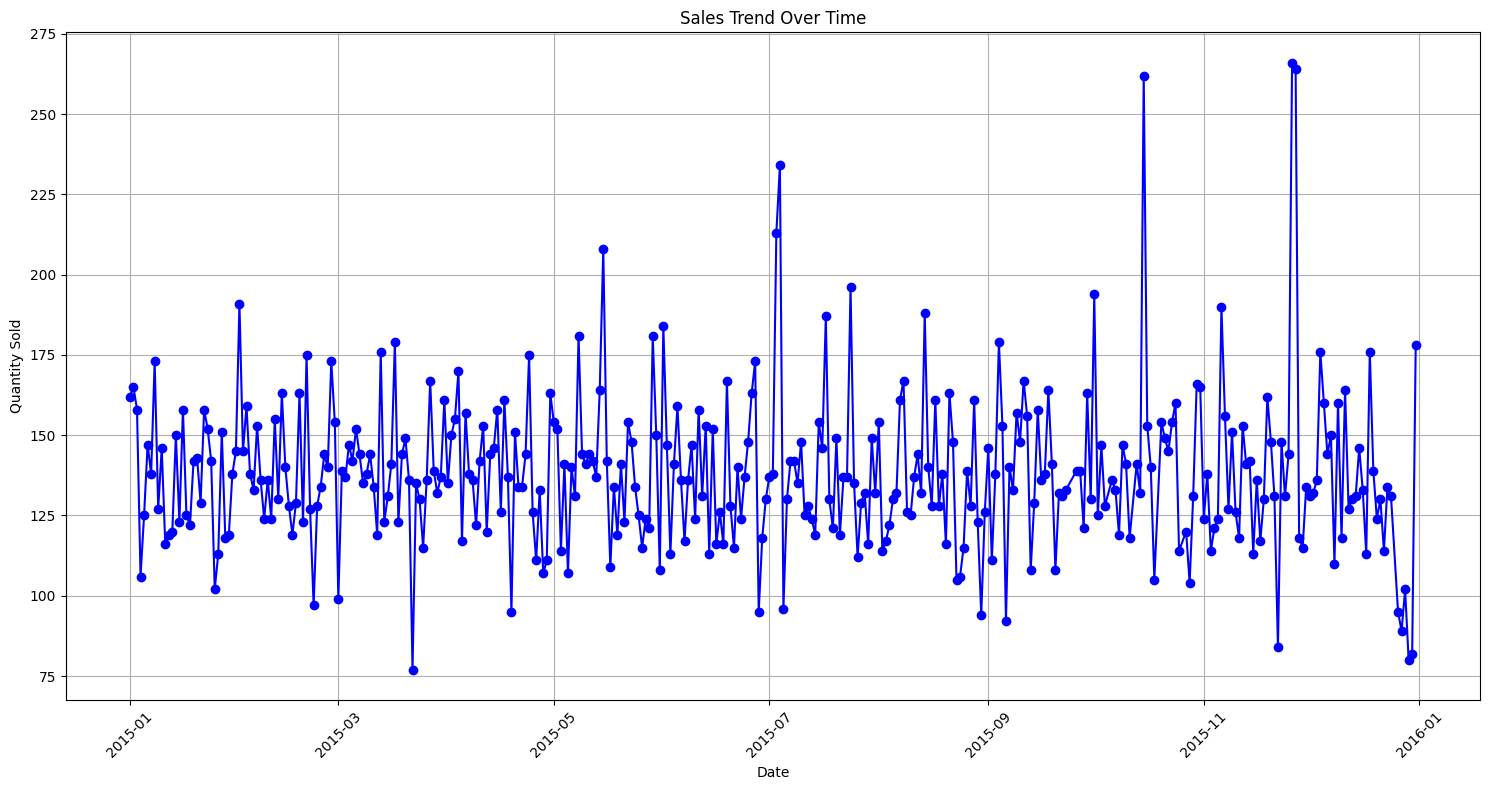

C:\Users\sripathi\AppData\Local\Temp\ipykernel_9472\2298029625.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date')['total_price'].sum()


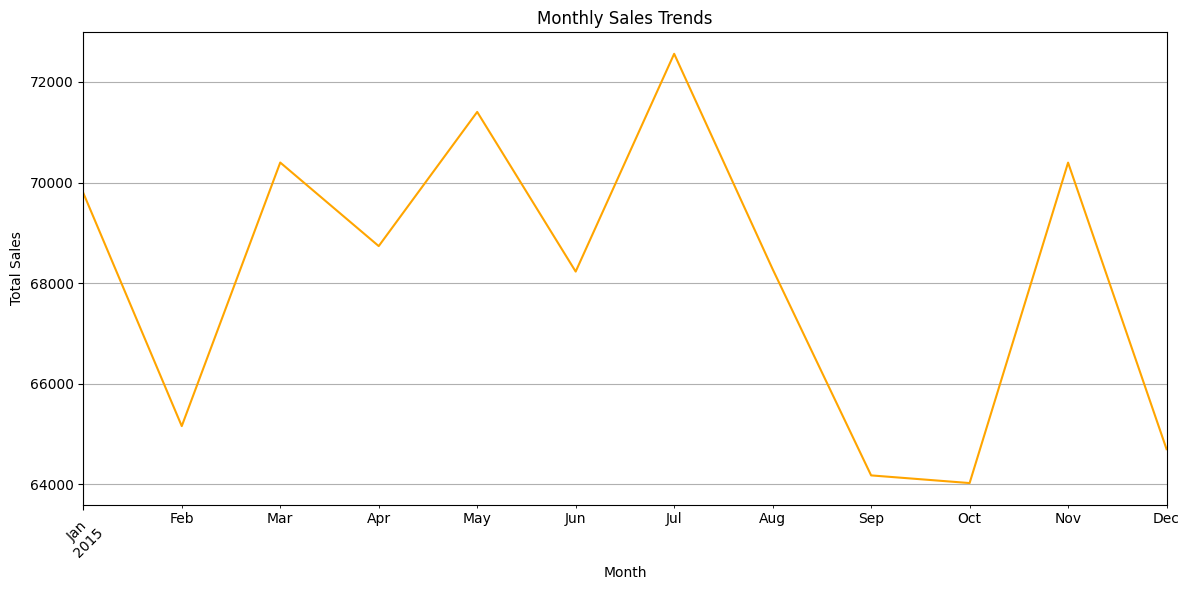

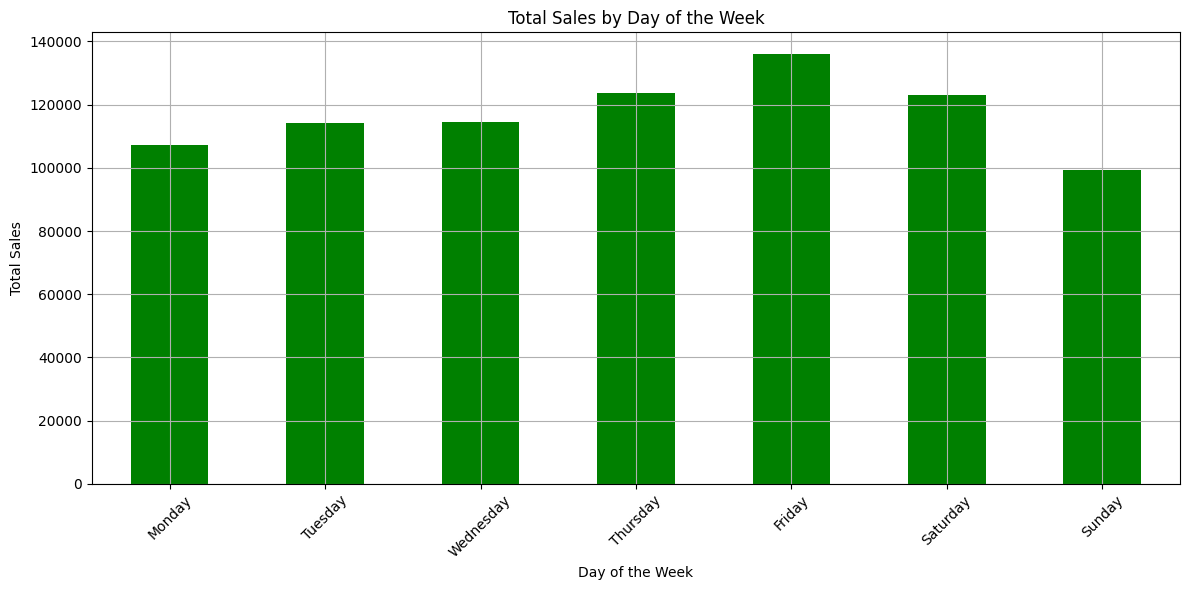

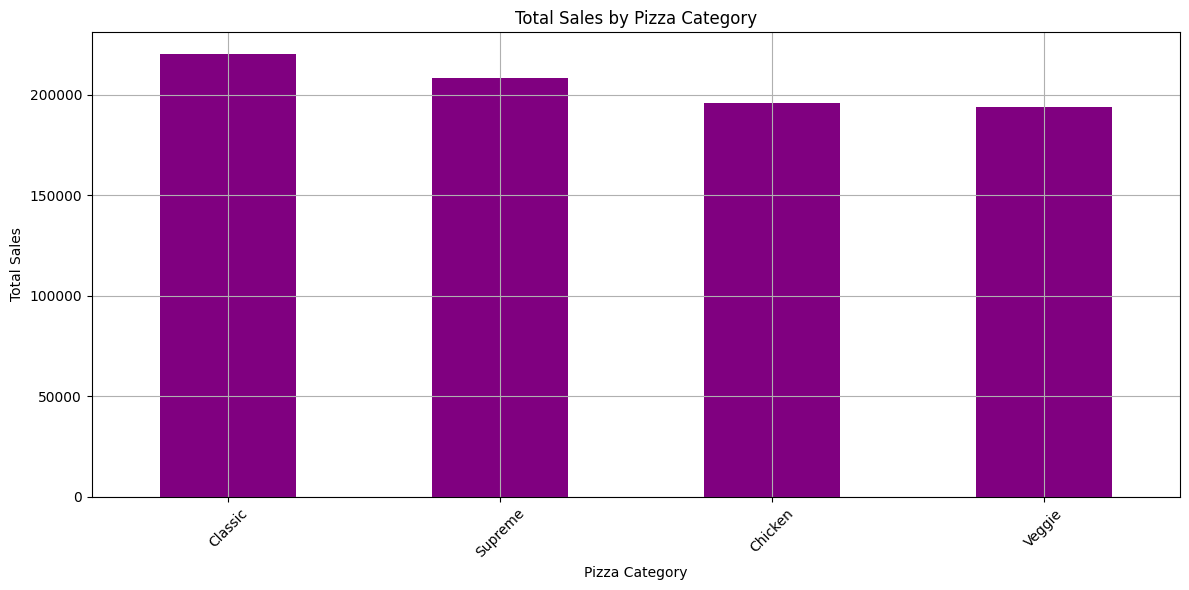

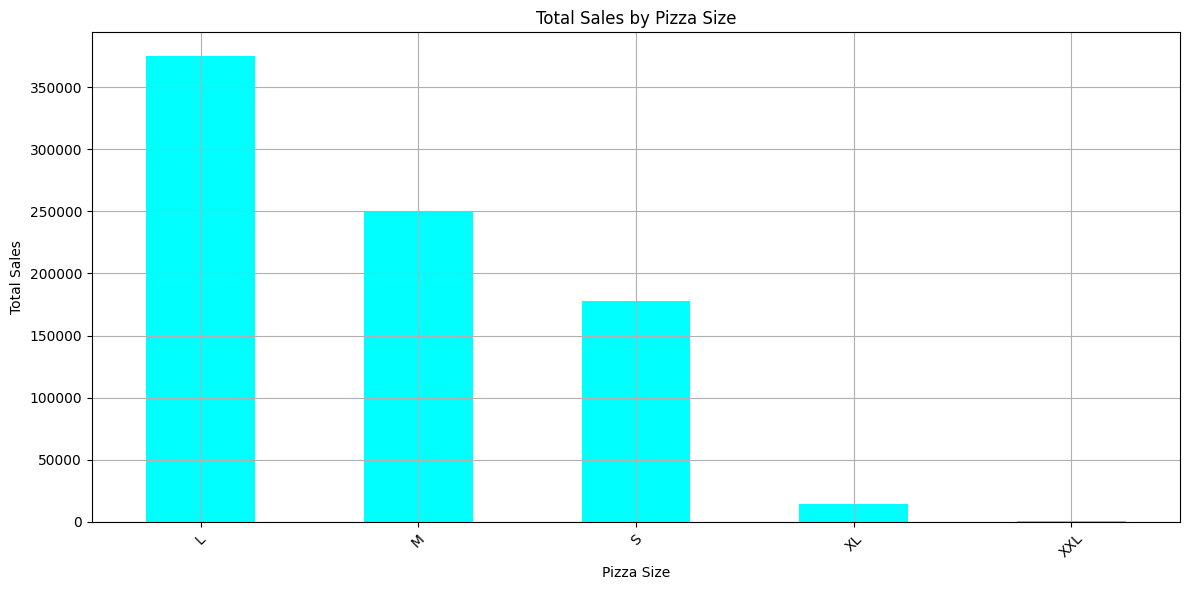

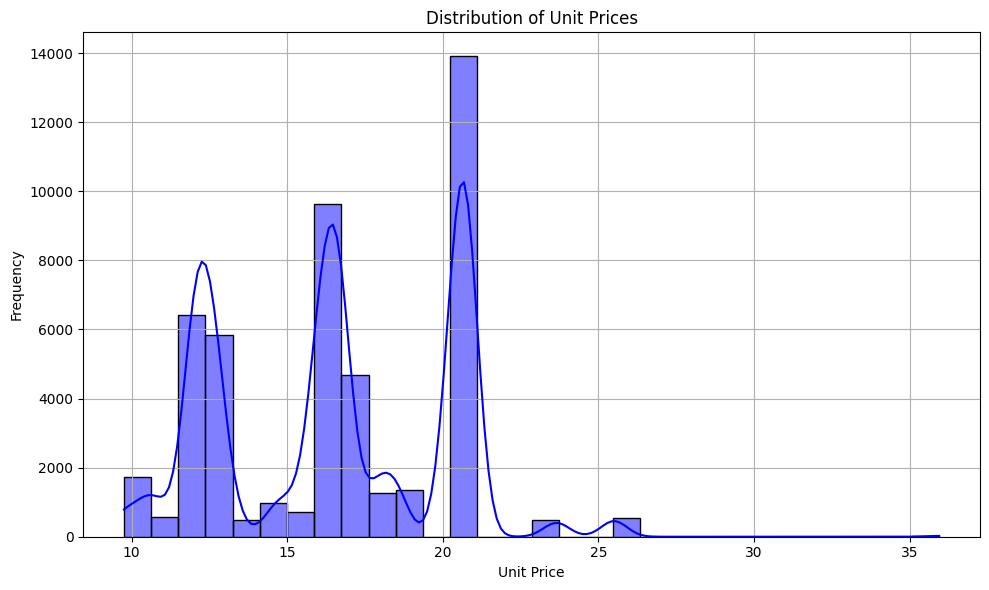

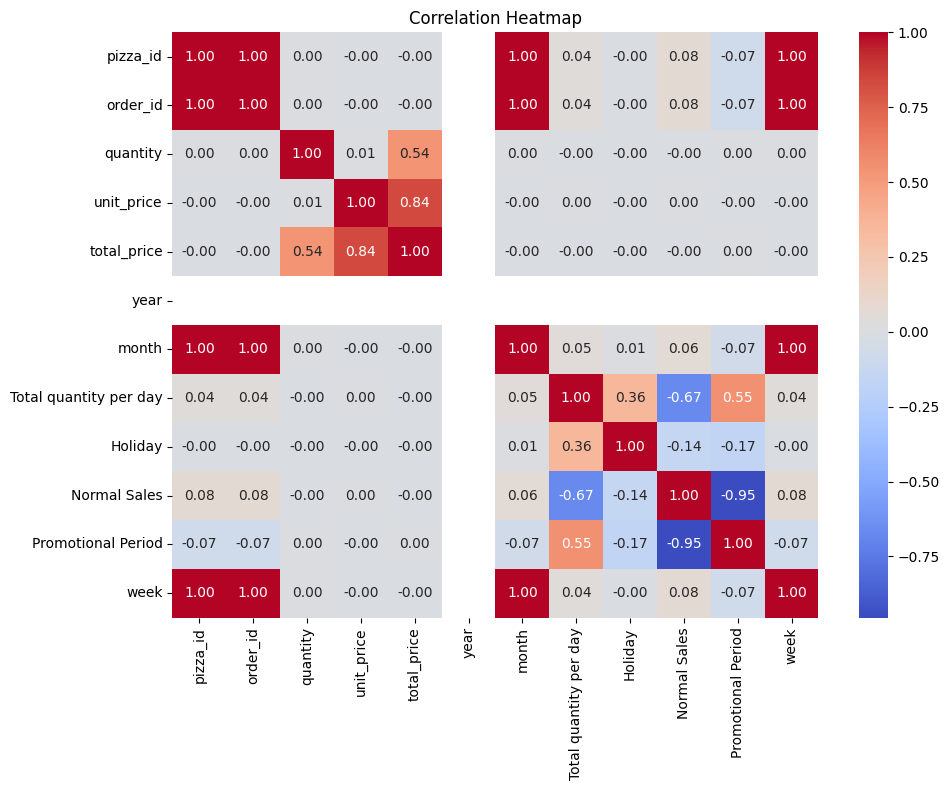

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df = pd.read_csv(file_path)

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract the week number from 'order_date'
df['week'] = df['order_date'].dt.isocalendar().week

# Step 1: Filter the dataset for week 7
week_7_sales = df[df['week'] == 7]

# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Step 3: List all grouped pizza names and their total quantities
print("Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Step 4: Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

# Extract additional time-based features
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 1. Sales Trend Over Time
sales_trend = df.groupby('order_date')['quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(sales_trend['order_date'], sales_trend['quantity'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trends
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='orange')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Sales by Day of the Week
weekly_sales = df.groupby('day_of_week')['total_price'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)

plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 6. Total Sales by Pizza Category
category_sales = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 7. Total Sales by Pizza Size
size_sales = df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', color='cyan')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 8. Distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['unit_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# 9. Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Data Exploration - Ingredients

In [61]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Ingredients.csv")

# Display basic info about the DataFrame
print("DataFrame Info:")
df.info()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify that there are no more duplicates
duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after cleaning: ", duplicates_after)

# Get unique values for each column
unique_values = {column: df[column].unique() for column in df.columns}

# Print the unique values
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()  # Print an empty line for better readability


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
Number of duplicate rows:  0
Number of duplicate rows after cleaning:  0
Unique values for column 'pizza_name_id':
['bbq_ckn_l' 'bbq_ckn_m' 'bbq_ckn_s' 'big_meat_s' 'brie_carre_s'
 'calabrese_l' 'calabrese_m' 'calabrese_s' 'cali_ckn_l' 'cali_ckn_m'
 'cali_ckn_s' 'ckn_alfredo_l' 'ckn_alfredo_m' 'ckn_alfredo_s'
 'ckn_pesto_l' 'ckn_pesto_m' 'ckn_pesto_s' 'classic_dlx_l' 'classic_dlx_m'
 'classic_dlx_s' 'five_cheese_l' 'four_cheese_l' 'four_cheese_m'
 'green_garden_l' 'green_garden_m' 'green_garden_s' 'hawaiian_l'
 'hawaiian_m' 'ha

Data Cleaning - Ingredients 

In [63]:
import pandas as pd

# Load the initial dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Ingredients.csv")

# Fill the null values for 'Items_Qty_In_Grams' based on conditions
df.loc[(df['pizza_ingredients'] == 'Caramelized Onions') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0
df.loc[(df['pizza_name_id'] == 'hawaiian_l') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 60.0
df.loc[(df['pizza_name_id'] == 'hawaiian_m') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 40.0
df.loc[(df['pizza_name_id'] == 'hawaiian_s') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0

# Convert 'Items_Qty_In_Grams' to integer type
df['Items_Qty_In_Grams'] = df['Items_Qty_In_Grams'].astype(int)

# Replace specific ingredient names for consistency
df['pizza_ingredients'] = df['pizza_ingredients'].replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

# Save the cleaned DataFrame to a new CSV file
Output_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Ingredients.csv"
df.to_csv(Output_path, index=False)

# Display basic information about the loaded ingredients data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pizza_name_id       518 non-null    object
 1   pizza_name          518 non-null    object
 2   pizza_ingredients   518 non-null    object
 3   Items_Qty_In_Grams  518 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 14.3+ KB


Weekly sales

In [2]:
import pandas as pd
import os

# Load the CSV file
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df = pd.read_csv(file_path)

# Ensure the date column is in datetime format (replace 'Date' with the actual column name)
df['order_date'] = pd.to_datetime(df['order_date'])

# Sort the data by the date column
df = df.sort_values('order_date')

# Create a new column for the week number (using ISO week starting from Monday)
df['Week_Number'] = df['order_date'].dt.isocalendar().week

# Create a directory to save the weekly datasets if it doesn't exist
output_dir = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales"
os.makedirs(output_dir, exist_ok=True)

# Group the data by Week_Number and create a separate CSV for each week
for week, group in df.groupby('Week_Number'):
    week_file_path = os.path.join(output_dir, f"Week_{week}_Sales.csv")
    group.to_csv(week_file_path, index=False)
    print(f"Week {week} data saved to {week_file_path}")


Week 1 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_1_Sales.csv
Week 2 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_2_Sales.csv
Week 3 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_3_Sales.csv
Week 4 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_4_Sales.csv
Week 5 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_5_Sales.csv
Week 6 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_6_Sales.csv
Week 7 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_7_Sales.csv
Week 8 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_8_Sales.csv
Week 9 data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Weekly_Sales\Week_9_Sales.csv
Week 10 data saved 

Model Selection& Training

 Prophet 

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
import warnings
import pickle  # Import pickle for saving models

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Load the data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
pizza_sales = pd.read_csv(file_path)

# Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)  # Required format for Prophet
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# Step 2: Train individual models for each pizza_name_id
def train_models_for_all_pizzas(pizza_sales_weekly):
    pizza_models = {}
    pizza_forecasts = {}
    pizza_mape_scores = []

    for pizza_id in pizza_sales_weekly['pizza_name_id'].unique():
        # Filter the sales data for this specific pizza
        pizza_data = pizza_sales_weekly[pizza_sales_weekly['pizza_name_id'] == pizza_id]

        # Split the data into training and testing sets
        train_size = int(0.8 * len(pizza_data))
        train, test = pizza_data[:train_size], pizza_data[train_size:]

        # Train Prophet model
        model = Prophet()
        model.fit(train)

        # Make predictions for the test period
        future = model.make_future_dataframe(periods=len(test), freq='W')
        forecast = model.predict(future)

        # Extract predicted values for test period
        predictions = forecast['yhat'][-len(test):].values

        # Calculate MAPE score for model performance
        prophet_mape = mape(test['y'], predictions)
        pizza_mape_scores.append({'pizza_name_id': pizza_id, 'mape': prophet_mape})
        pizza_models[pizza_id] = model  # Save model for later use

        # Save forecasted values
        pizza_forecasts[pizza_id] = forecast[['ds', 'yhat']].tail(len(test)).reset_index(drop=True)

    # Combine all forecasts into a single DataFrame
    all_forecasts = pd.concat([pd.DataFrame({'pizza_name_id': pizza_id, 'ds': pizza_forecasts[pizza_id]['ds'], 'yhat': pizza_forecasts[pizza_id]['yhat']}) 
                                for pizza_id in pizza_forecasts], ignore_index=True)

    # Save all forecast results to a single CSV file
    all_forecast_file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\All_Pizza_Forecasts.csv"
    all_forecasts.to_csv(all_forecast_file_path, index=False)
    print(f"All forecast results saved to {all_forecast_file_path}")

    return pizza_models, pizza_mape_scores

# Step 3: Train the models
pizza_models, pizza_mape_scores = train_models_for_all_pizzas(pizza_sales_weekly)

# Step 4: Save trained models to a file
with open(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\trained_pizza_models.pkl", 'wb') as f:
    pickle.dump(pizza_models, f)
print("Trained pizza models saved to trained_pizza_models.pkl")

# Print MAPE for each pizza
for item in pizza_mape_scores:
    print(f'Pizza {item["pizza_name_id"]}: MAPE = {item["mape"]:.2f}')


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
22:56:51 - cmdstanpy - INFO - Chain [1] start processing
22:56:52 - cmdstanpy - INFO - Chain [1] done processing
22:56:53 - cmdstanpy - INFO - Chain [1] start processing
22:56:53 - cmdstanpy - INFO - Chain [1] done processing
22:56:53 - cmdstanpy - INFO - Chain [1] start processing
22:56:53 - cmdstanpy - INFO - Chain [1] done processing
22:56:53 - cmdstanpy - INFO - Chain [1] start processing
22:56:54 - cmdstanpy - INFO - Chain [1] done processing
22:56:54 - cmdstanpy - INFO - Chain [1] start processing
22:56:54 - cmdstanpy - INFO - Chain [1] done processing
22:56:54 - cmdstanpy - INFO - Chain [1] start processing
22:56:54 - cmdstanpy - INFO - Chain [1] done processing
22:56:54 - cmdstanpy - INFO - Chain [1] s

All forecast results saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\All_Pizza_Forecasts.csv
Trained pizza models saved to trained_pizza_models.pkl
Pizza bbq_ckn_l: MAPE = 0.31
Pizza bbq_ckn_m: MAPE = 0.48
Pizza bbq_ckn_s: MAPE = 0.37
Pizza big_meat_s: MAPE = 0.17
Pizza brie_carre_s: MAPE = 0.41
Pizza calabrese_m: MAPE = 0.59
Pizza calabrese_s: MAPE = 0.48
Pizza cali_ckn_l: MAPE = 0.42
Pizza cali_ckn_m: MAPE = 0.26
Pizza cali_ckn_s: MAPE = 0.58
Pizza ckn_alfredo_l: MAPE = 0.56
Pizza ckn_alfredo_m: MAPE = 0.27
Pizza ckn_alfredo_s: MAPE = 0.55
Pizza ckn_pesto_l: MAPE = 0.93
Pizza ckn_pesto_m: MAPE = 1.04
Pizza ckn_pesto_s: MAPE = 0.39
Pizza classic_dlx_l: MAPE = 0.19
Pizza classic_dlx_m: MAPE = 0.28
Pizza classic_dlx_s: MAPE = 0.26
Pizza five_cheese_l: MAPE = 0.34
Pizza four_cheese_l: MAPE = 0.19
Pizza four_cheese_m: MAPE = 0.49
Pizza green_garden_l: MAPE = 0.89
Pizza green_garden_m: MAPE = 0.70
Pizza green_garden_s: MAPE = 0.53
Pizza hawaiian_l: MAPE = 0.37
Pizza hawa

Purchase Order 

In [4]:
import pandas as pd
from prophet import Prophet
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load trained models
with open(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\trained_pizza_models.pkl", 'rb') as f:
    pizza_models = pickle.load(f)

# Load the pizza sales data
pizza_sales = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv")

# Step 1: Prepare weekly sales by pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Step 2: Predict next week's sales for each pizza type
def forecast_next_week_sales(pizza_models, pizza_sales_weekly_by_pizza, periods=7):
    pizza_forecasts = {}

    for pizza_id in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_id]
        model = pizza_models[pizza_id]

        future = model.make_future_dataframe(periods=periods, freq='D')
        forecast = model.predict(future)
        
        # Sum up the forecast for the next week
        forecasted_quantity = forecast[['ds', 'yhat']].tail(periods)['yhat'].sum()
        pizza_forecasts[pizza_id] = forecasted_quantity
    
    return pizza_forecasts

# Step 3: Calculate the ingredient purchase order
def calculate_purchase_order(pizza_forecasts):
    # Load the ingredient data
    ingredients = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Ingredients.csv")
    
    # Copy ingredients and map predicted sales
    ingredients['predicted_quantity'] = ingredients['pizza_name_id'].map(pizza_forecasts)
    
    # Calculate total ingredient quantity needed
    ingredients['total_ingredient_qty'] = ingredients['Items_Qty_In_Grams'] * ingredients['predicted_quantity']
    
    # Group by ingredient type and sum the total quantity
    ingredient_totals = ingredients.groupby('pizza_ingredients')['total_ingredient_qty'].sum().reset_index()
    ingredient_totals['total_ingredient_qty_kg'] = ingredient_totals['total_ingredient_qty'] / 1000  # Convert to kg
    
    return ingredient_totals

# Step 4: Generate the forecasts and purchase order
next_week_pizza_sales_forecasts = forecast_next_week_sales(pizza_models, pizza_sales_weekly_by_pizza, periods=7)
purchase_order = calculate_purchase_order(next_week_pizza_sales_forecasts)

# Step 5: Save the purchase order to CSV
purchase_order_output_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Purchase_Order.csv"
purchase_order.to_csv(purchase_order_output_path, index=False)

# Print the purchase order
print(purchase_order)


          pizza_ingredients  total_ingredient_qty  total_ingredient_qty_kg
0             Alfredo Sauce           1974.128250                 1.974128
1                 Anchovies           6018.269417                 6.018269
2                Artichokes          16614.104956                16.614105
3                   Arugula           1984.249353                 1.984249
4             Asiago Cheese           9176.050136                 9.176050
..                      ...                   ...                      ...
59  Thai Sweet Chilli Sauce           7695.963085                 7.695963
60                    Thyme            344.818472                 0.344818
61                 Tomatoes          78580.948629                78.580949
62                 Zucchini           5709.394071                 5.709394
63             nduja Salami           5280.130678                 5.280131

[64 rows x 3 columns]


In [5]:
import pandas as pd 
import pandas as pd 

df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Purchase_Order.csv")
df.info()

# Set display option to show all rows
pd.set_option("display.max_rows", None)

# Display the DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pizza_ingredients        64 non-null     object 
 1   total_ingredient_qty     64 non-null     float64
 2   total_ingredient_qty_kg  64 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


,pizza_ingredients,total_ingredient_qty,total_ingredient_qty_kg
0,Alfredo Sauce,1974.128250,1.974128
1,Anchovies,6018.269417,6.018269
2,Artichokes,16614.104956,16.614105
3,Arugula,1984.249353,1.984249
4,Asiago Cheese,9176.050136,9.176050
5,Bacon,68500.061272,68.500061
6,Barbecue Chicken,10055.187108,10.055187
7,Barbecue Sauce,3449.308032,3.449308
8,Beef Chuck Roast,20356.450957,20.356451
9,Blue Cheese,5688.747925,5.688748


Advanced - Test Case on Progress 

Particular week prediction

In [8]:
import pandas as pd
from prophet import Prophet
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the pizza sales data
pizza_sales = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv")

# Load the trained pizza models
with open(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\trained_pizza_models.pkl", 'rb') as f:
    pizza_models = pickle.load(f)

# Prepare weekly sales data
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Function to forecast sales for a specific week
def forecast_sales_for_specific_week(pizza_models, pizza_sales_weekly_by_pizza, week_start, periods=7):
    # Create a dictionary to store forecasted sales
    pizza_forecasts = {}
    
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        # Filter data for the specific pizza type
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]
        
        # Prepare the training data
        train = pizza_type_data[['ds', 'y']]
        
        # Load the model for this pizza type
        model = pizza_models[pizza_type]
        
        # Create a dataframe for future predictions
        future_dates = pd.date_range(start=week_start, periods=periods, freq='D')
        future = pd.DataFrame({'ds': future_dates})
        
        # Forecast sales
        forecast = model.predict(future)
        
        # Store the forecasted sales
        pizza_forecasts[pizza_type] = forecast[['ds', 'yhat']].set_index('ds')['yhat'].tolist()
    
    return pizza_forecasts

# Function to generate purchase order
def generate_purchase_order(pizza_forecasts, ingredients_df):
    ingredients_predicted = ingredients_df.copy()

    # Initialize a column to hold the predicted quantity for each pizza type
    ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(lambda x: sum(pizza_forecasts.get(x, [])))

    # Calculate the total ingredient quantity in grams
    ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']
    
    # Grouping the ingredients by ingredient type and summing the total ingredient quantity
    grouped_ingredients_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().reset_index()

    # Adding a new column for total ingredient quantity in kilograms
    grouped_ingredients_totals['total_ingredient_qty_kg'] = grouped_ingredients_totals['total_ingredient_qty'] / 1000.0
    
    return grouped_ingredients_totals

# Main execution
if __name__ == "__main__":
    # Ask user for the week they want to generate a purchase order for
    user_input_week = input("Please enter the start date of the week (YYYY-MM-DD): ")
    
    # Load the ingredients data
    ingredients = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Ingredients.csv")
    
    # Get the forecasts for the specified week
    pizza_forecasts = forecast_sales_for_specific_week(pizza_models, pizza_sales_weekly_by_pizza, user_input_week)
    
    # Generate the purchase order
    purchase_order = generate_purchase_order(pizza_forecasts, ingredients)

    # Display the results for grouped predicted ingredients
    print("\nTotal quantity of predicted ingredients for the week starting on", user_input_week, "(grouped):")
    for index, row in purchase_order.iterrows():
        ingredient = row['pizza_ingredients']
        total_qty_grams = row['total_ingredient_qty']
        total_qty_kg = row['total_ingredient_qty_kg']
        print(f'{ingredient}: {total_qty_grams:.2f} grams ({total_qty_kg:.2f} kg)')

    # Optionally, you can save the grouped totals to a CSV file for the purchase order
    purchase_order_output_path = f"D:\\Guvi\\projects\\Dominos_Predictive_Purchase_Order_System\\Purchase_Order_Week_Start_{user_input_week}.csv"
    purchase_order.to_csv(purchase_order_output_path, index=False)
    print(f"\nPurchase order saved to {purchase_order_output_path}")



Total quantity of predicted ingredients for the week starting on 2024-10-21 (grouped):
Alfredo Sauce: 671.57 grams (0.67 kg)
Anchovies: 11895.17 grams (11.90 kg)
Artichokes: 9164.63 grams (9.16 kg)
Arugula: 2618.84 grams (2.62 kg)
Asiago Cheese: 1060.78 grams (1.06 kg)
Bacon: 116896.91 grams (116.90 kg)
Barbecue Chicken: -1904.47 grams (-1.90 kg)
Barbecue Sauce: -921.92 grams (-0.92 kg)
Beef Chuck Roast: 853.03 grams (0.85 kg)
Blue Cheese: 2366.16 grams (2.37 kg)
Brie Carre Cheese: 3862.96 grams (3.86 kg)
Calabrese Salami: 4917.53 grams (4.92 kg)
Capocollo: 34359.09 grams (34.36 kg)
Caramelized Onions: 2575.31 grams (2.58 kg)
Chicken: 176905.95 grams (176.91 kg)
Chipotle Sauce: 16363.59 grams (16.36 kg)
Chorizo Sausage: 15537.26 grams (15.54 kg)
Cilantro: 8181.80 grams (8.18 kg)
Coarse Sicilian Salami: 10294.99 grams (10.29 kg)
Corn: 54517.03 grams (54.52 kg)
Eggplant: -8296.01 grams (-8.30 kg)
Feta Cheese: 18945.79 grams (18.95 kg)
Fontina Cheese: 3630.21 grams (3.63 kg)
Friggitello 